In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline


In [2]:
amz_review=pd.read_csv('Reviews.csv')

In [3]:
amz_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
amz_review.shape

(568454, 10)

In [5]:
amz_review['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
amz_review['Summary'][0]

'Good Quality Dog Food'

In [7]:
amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False).head(25)

Id  ProfileName  HelpfulnessNumerator  \
UserId         ProductId                                           
A29JUMRL1US6YP B000WFKWDI  11           11                    11   
               B000WFU8O6  11           11                    11   
               B000WFN0VO  11           11                    11   
               B000WFORH0  11           11                    11   
               B000WFKI82  11           11                    11   
               B000WFEN74  11           11                    11   
               B000WFPJIG  11           11                    11   
               B000WFRQQ4  11           11                    11   
               B00008CQVA  11           11                    11   
               B000084EZ4  11           11                    11   
               B000WFUL3E  11           11                    11   
A3TVZM3ZIXG8YW B003M60K54  10           10                    10   
               B000084DWM  10           10                    10   
               B001VIY8BW  10           10                    10   
               B000QSN7P6  10           10                    10   
               B003ANFMY8  10           10                    10   
               B003BJOORW  10           10                    10   
               B003M5TG28  10           10                    10   
               B001VIYCK4  10           10                    10   
               B003MA8P02  10           10                    10   
               B0002MLA5K  10           10                    10   
               B003MW7858  10           10                    10   
               B003MWBFMK  10           10                    10   
               B003MWBFXY  10           10                    10   
               B003WK0D8O  10           10                    10   

                           HelpfulnessDenominator  Score  Time  Summary  Text  
UserId         ProductId                                                       
A29JUMRL1US6YP B000WFKWDI                      11     11    11       11    11  
               B000WFU8O6                      11     11    11       11    11  
               B000WFN0VO                      11     11    11       11    11  
               B000WFORH0                      11     11    11       11    11  
               B000WFKI82                      11     11    11       11    11  
               B000WFEN74                      11     11    11       11    11  
               B000WFPJIG                      11     11    11       11    11  
               B000WFRQQ4                      11     11    11       11    11  
               B00008CQVA                      11     11    11       11    11  
               B000084EZ4                      11     11    11       11    11  
               B000WFUL3E                      11     11    11       11    11  
A3TVZM3ZIXG8YW B003M60K54                      10     10    10       10    10  
               B000084DWM                      10     10    10       10    10  
               B001VIY8BW                      10     10    10       10    10  
               B000QSN7P6                      10     10    10       10    10  
               B003ANFMY8                      10     10    10       10    10  
               B003BJOORW                      10     10    10       10    10  
               B003M5TG28                      10     10    10       10    10  
               B001VIYCK4                      10     10    10       10    10  
               B003MA8P02                      10     10    10       10    10  
               B0002MLA5K                      10     10    10       10    10  
               B003MW7858                      10     10    10       10    10  
               B003MWBFMK                      10     10    10       10    10  
               B003MWBFXY                      10     10    10       10    10  
               B003WK0D8O                      10     10    10       10    10

In [8]:
((amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        5859
ProfileName               5859
HelpfulnessNumerator      5859
HelpfulnessDenominator    5859
Score                     5859
Time                      5859
Summary                   5859
Text                      5859
dtype: int64

In [9]:
amz_review['Text_lenght']=amz_review['Text'].apply(lambda col: len(col.split(' ')))

In [10]:
amz_review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght'],
      dtype='object')

(0, 10)

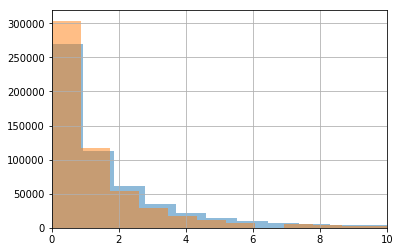

In [11]:
amz_review['HelpfulnessDenominator'].hist(bins=1000,alpha=0.5);
amz_review['HelpfulnessNumerator'].hist(bins=1000,alpha=0.5);
plt.xlim(0,10)

(100, 1000)

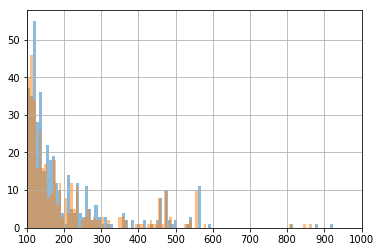

In [12]:
amz_review[amz_review['HelpfulnessDenominator']>100]['HelpfulnessDenominator'].hist(bins=100,alpha=0.5);
amz_review[amz_review['HelpfulnessNumerator']>100]['HelpfulnessNumerator'].hist(bins=100,alpha=0.5);
plt.xlim(100,1000)

(0, 400)

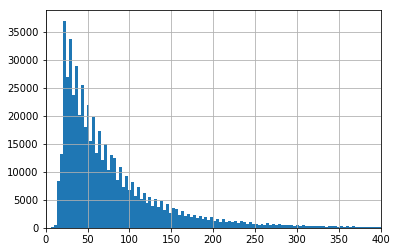

In [13]:
amz_review['Text_lenght'].hist(bins=1000);
plt.xlim(0,400)

In [14]:
amz_review['Time_converted']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
amz_review['Time_converted_ym']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [15]:
amz_review['Time_converted'].max()

'2012-10-26'

In [16]:
amz_review['Time_converted'].min()

'1999-10-08'

In [19]:
#had to remove time since same revireer/item had more than same time frame unfortunately and keeping time in subset would not clean them

amz_review_sorted_drop_duplicated=amz_review.drop_duplicates(subset=['UserId','ProductId'], keep='first', inplace=False)

In [20]:
amz_review_sorted_drop_duplicated.shape

(560804, 13)

In [21]:
((amz_review_sorted_drop_duplicated.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
dtype: int64

In [22]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_lenght                0
Time_converted             0
Time_converted_ym          0
dtype: int64

In [23]:
#clean cells in review that are parsed by mistake and still have html heading "<span "

def clean_span(col):  
    
    if('<span' not in col.lower()):

        return col.lower()

In [24]:
#pd.options.mode.chained_assignment = None
amz_review_sorted_drop_duplicated['Text_new']=amz_review_sorted_drop_duplicated['Text'].apply(clean_span)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
Text_lenght                 0
Time_converted              0
Time_converted_ym           0
Text_new                  373
dtype: int64

In [26]:
amz_review_sorted_drop_duplicated.dropna(inplace=True)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
dtype: int64

In [33]:
amz_review_sorted_drop_duplicated.shape

(560388, 14)

In [28]:
stop_word_list =[]
for word in open('stopword_short_long_mod.txt'):
    #print(word)
    stop_word_list.append(word.replace('\n',''))
    
stop_word_list=list(set(stop_word_list))   
len(stop_word_list)

642

In [29]:
#special characters
special_char_list=['\\','`','\"',"'",'*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']

In [30]:
def remove_stopword(col):
        #print(stop_word_list)
        col_list=[]
        txt_col_split=col.lower().replace('\n'," ").strip().split(" ")
        #print(txt_col_split)
        for word_ in txt_col_split:
            #print(word)
            #print(word in col.split(" "))
            #for stop_w in stop_word_list:               
            if ((word_ not in stop_word_list) and len(word)>3):
                #col=col.replace(word,"") #.replace("  "," ")
                #print(col)
                col_list.append(word_)

        return (col_list)             
                
def remove_specialchar(col):
        #print(stop_word_list)
        for word in special_char_list:
            #print(word)
            #print(word in col.split(" "))
            
            #for stop_w in stop_word_list:               
            if word in col: #col.split(" "):
                col=col.replace(word,"").replace("  "," ")
                #print(col)

        return col                  
    

#amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated.loc[:,'Text_new'].apply(remove_stopword)

In [31]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new'].apply(remove_specialchar)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new2'].apply(remove_stopword)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
amz_review_sorted_drop_duplicated['Text_new2'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [35]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
Text_new2                 0
dtype: int64

In [36]:
#amz_review_sorted_drop_duplicated.dtypes

In [37]:
def score_pos_neg(col):
    
    if col>3:
        return 1
    else:
        return 0
    

In [38]:
amz_review_sorted_drop_duplicated['score_pos_neg']=amz_review_sorted_drop_duplicated['Score'].apply(score_pos_neg)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


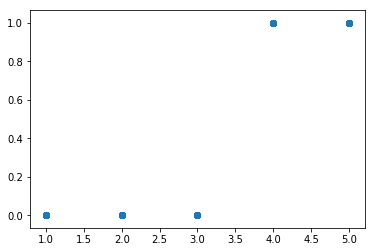

In [39]:
plt.scatter(amz_review_sorted_drop_duplicated['Score'],amz_review_sorted_drop_duplicated['score_pos_neg'])

In [40]:
amz_review_sorted_drop_duplicated.to_csv('amazon_review_parsed.csv',index=False)

In [83]:
amz_review_sorted_drop_duplicated.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,Text_new3,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,2011-06-13,2011-06,if you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[secret, ingredient, robitussin, addition, roo...",0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21,2012-10,great taffy at a great price. there was a wid...,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,...",1


(0, 20)

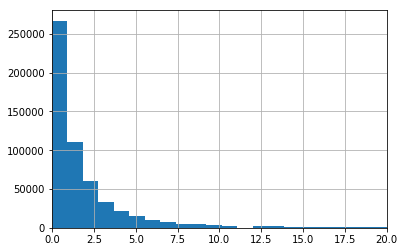

In [41]:
amz_review_sorted_drop_duplicated['HelpfulnessDenominator'].hist(bins=1000);
plt.xlim(0,20)

In [42]:
user_number_review=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)
#amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean()
user_number_review.head()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
UserId,,,,,,,,,,,,,,,
A3OXHLG6DIBRW8,419,419,419,419,419,419,419,419,419,419,419,419,419,419,419
AY12DBB0U420B,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
A281NPSIMI1C2R,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
A1YUL9PCJR3JTY,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
A1Z54EM24Y40LL,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251


In [44]:
user_top_reviewer=user_number_review[user_number_review['Id']>10][['Id']]
user_top_reviewer.head(10)   #11 to 419

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251
A2MUGFV2TDQ47K,201
AZV26LP92E6WU,167
AQQLWCMRNDFGI,167
A1UQBFCERIP7VJ,157


In [45]:
user_top_reviewer.to_csv('amazon_top_reviewer_list.csv')

In [51]:
#amz_review_sorted_drop_duplicated.groupby(by=['UserId'])['Time_converted'].max()

In [54]:
amz_review_sorted_drop_duplicated.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1


In [68]:
user_average_info=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean() #['UserId']  #=='A3OXHLG6DIBRW8' #.sort_values(by=['Text'],ascending=False)

In [69]:
user_average_info.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg
UserId,,,,,,,
#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,56.0,1.0
#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,21.0,1.0
#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,85.0,1.0
#oc-R10LT57ZGIB140,378693.0,0.0,0.0,3.0,1.310602e+09,45.0,0.0
#oc-R10UA029WVWIUI,136545.0,0.0,0.0,1.0,1.342483e+09,66.0,0.0


In [107]:
user_average_info.to_csv('amazon_reviewer_avg_info.csv')

In [70]:
user_top_reviewer.head()

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251


In [96]:
top_reviewer_avg_data=pd.merge(user_average_info,user_top_reviewer,how='inner',on='UserId')


In [97]:
top_reviewer_avg_data['ratio_helpful']=top_reviewer_avg_data['HelpfulnessNumerator']/top_reviewer_avg_data['HelpfulnessDenominator']

In [190]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [142]:
top_reviewer_avg_data['Time'][0]

1315171374.5454545

In [144]:
top_reviewer_avg_data['Time_converted']=top_reviewer_avg_data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [99]:
top_reviewer_avg_data=top_reviewer_avg_data[(top_reviewer_avg_data['ratio_helpful']>0.0) & (top_reviewer_avg_data['ratio_helpful']<1.0)]

In [314]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [133]:
colors = np.random.rand(top_reviewer_avg_data.shape[0])

In [293]:
# plt.scatter(top_reviewer_avg_data['Time_converted'],top_reviewer_avg_data['Score']);
# #plt.xlim(0,600);
# plt.xlabel('Date');
# plt.ylabel('Review Helpfullness 0-1 scale');
# plt.xticks(rotation=90);

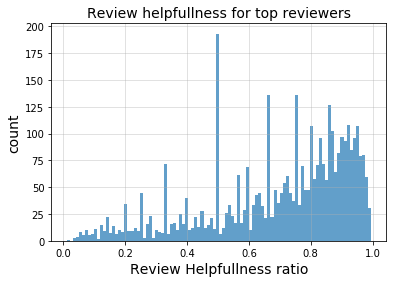

In [301]:
top_reviewer_avg_data['ratio_helpful'].hist(bins=100,label='review helpfullness top reviewers',alpha=0.7);
#plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'])
plt.xlabel('Review Helpfullness ratio',fontsize=14);
plt.ylabel('count',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfullness for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_dist.png')

In [302]:
# sns.distplot(top_reviewer_avg_data['ratio_helpful'],bins=100,label='review helpfullness')
# plt.xlabel('Review Helpfullness 0-1 scale');
# plt.ylabel('count');
# plt.xlim(0,1.0);


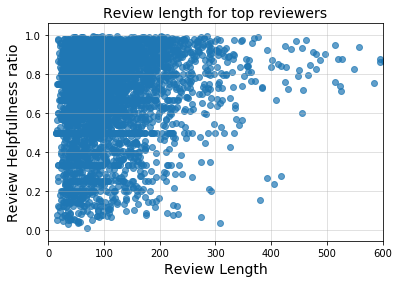

In [300]:
plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,600);
plt.xlabel('Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);
#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review length for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length.png')

In [159]:
#sns.scatterplot(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'])

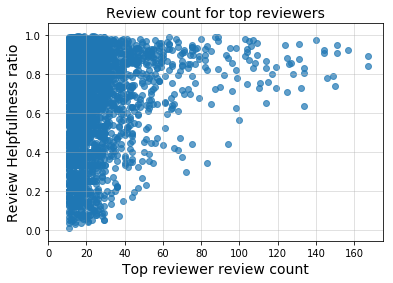

In [303]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,175);
plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_count.png')

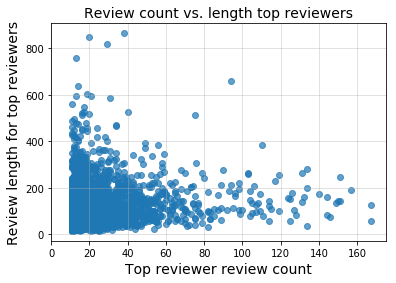

In [304]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['Text_lenght'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,175);

plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review length for top reviewers',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count vs. length top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length_count.png')

In [305]:
# plt.scatter(top_reviewer_avg_data['Score'],top_reviewer_avg_data['ratio_helpful']);
# plt.xlim(1.05,5);
# #no trend observed only less bad review on top reviewer

In [291]:
# df_2011_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2011-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2012-00')]
# df_2010_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2010-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2011-00')]
# df_2009_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2009-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2010-00')]


In [292]:
# df_2011_data['Time_converted_ym'] = pd.to_datetime(df_2011_data['Time_converted_ym']).dt.strftime('%H:%M')

In [289]:
# df_2011_data=amz_review_sorted_drop_duplicated[(amz_review_sorted_drop_duplicated['Time_converted_ym']>'2011-00') & (amz_review_sorted_drop_duplicated['Time_converted_ym']<'2012-00')]
# plt.figure(figsize=(24,4))
# sns.countplot(x="Time_converted_ym", data=df_2011_data)
# #sns.distplot(df_2011_data['Time_converted_ym']) didnot work
# #plt.hist(df_2011_data['Time_converted_ym']) too too long
# plt.xticks(rotation=90);

In [290]:
# plt.figure(figsize=(24,6))
# grp_date=amz_review_sorted_drop_duplicated.groupby(by=['Time_converted_ym']).count();
# grp_date.reset_index(inplace=True);
# plt.plot_date(x=grp_date['Time_converted_ym'],y=grp_date['Score']);
# plt.xticks(rotation=90);
# plt.xlim('2000-01','2012-10');
# #grp_date

In [254]:
grp_s1=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==1]
grp_s2=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==2]
grp_s3=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==3]
grp_s4=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==4]
grp_s5=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==5]

grp_date_1=grp_s1.groupby(by=['Time_converted_ym']).count();
grp_date_2=grp_s2.groupby(by=['Time_converted_ym']).count();
grp_date_3=grp_s3.groupby(by=['Time_converted_ym']).count();
grp_date_4=grp_s4.groupby(by=['Time_converted_ym']).count();
grp_date_5=grp_s5.groupby(by=['Time_converted_ym']).count();

grp_date_1.reset_index(inplace=True); #to make it to column
grp_date_2.reset_index(inplace=True);
grp_date_3.reset_index(inplace=True);
grp_date_4.reset_index(inplace=True);
grp_date_5.reset_index(inplace=True);

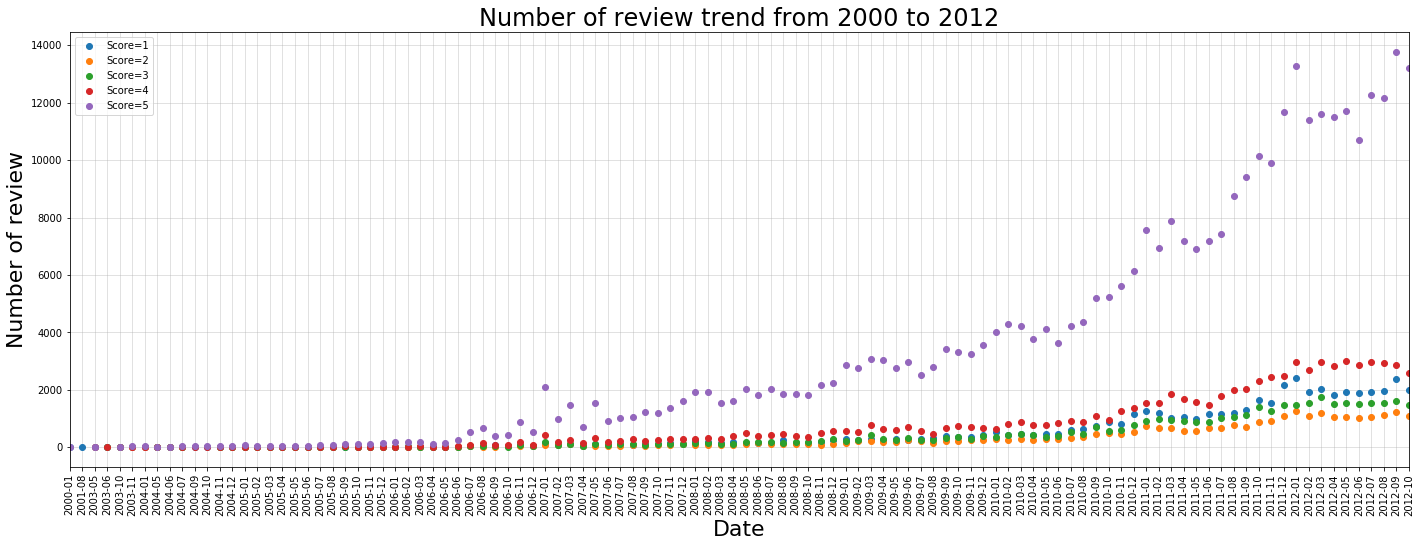

In [263]:
plt.figure(figsize=(24,8))

plt.plot_date(x=grp_date_1['Time_converted_ym'],y=grp_date_1['Score'],label='Score=1');
plt.plot_date(x=grp_date_2['Time_converted_ym'],y=grp_date_2['Score'],label='Score=2');
plt.plot_date(x=grp_date_3['Time_converted_ym'],y=grp_date_3['Score'],label='Score=3');
plt.plot_date(x=grp_date_4['Time_converted_ym'],y=grp_date_4['Score'],label='Score=4');
plt.plot_date(x=grp_date_5['Time_converted_ym'],y=grp_date_5['Score'],label='Score=5');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Number of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_trend.png')
#grp_date

In [279]:
#amz_review_sorted_drop_duplicated(by=['Time_converted_ym']).count()
grp_avg_date=amz_review_sorted_drop_duplicated.groupby(by=['Time_converted_ym']).mean()
grp_avg_date.reset_index(inplace=True);
grp_avg_date['Helpfulness_ratio']=grp_avg_date['HelpfulnessNumerator']/grp_avg_date['HelpfulnessDenominator']

In [281]:
grp_avg_date.isnull().sum()

Time_converted_ym         0
Id                        0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Text_lenght               0
score_pos_neg             0
Helpfulness_ratio         0
dtype: int64

In [282]:
grp_avg_date.head()

,Time_converted_ym,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Helpfulness_ratio
0,1999-10,150512.500000,1.000,1.000,5.0,940075200.0,81.50,1.000,1.000000
1,1999-12,377094.500000,0.750,1.500,5.0,944352000.0,35.75,1.000,0.500000
2,2000-01,330241.500000,7.875,9.375,3.5,947797200.0,51.00,0.625,0.840000
3,2000-02,352267.666667,2.000,3.000,4.0,951523200.0,244.00,1.000,0.666667
4,2000-06,211823.600000,3.400,4.800,5.0,960785280.0,42.60,1.000,0.708333


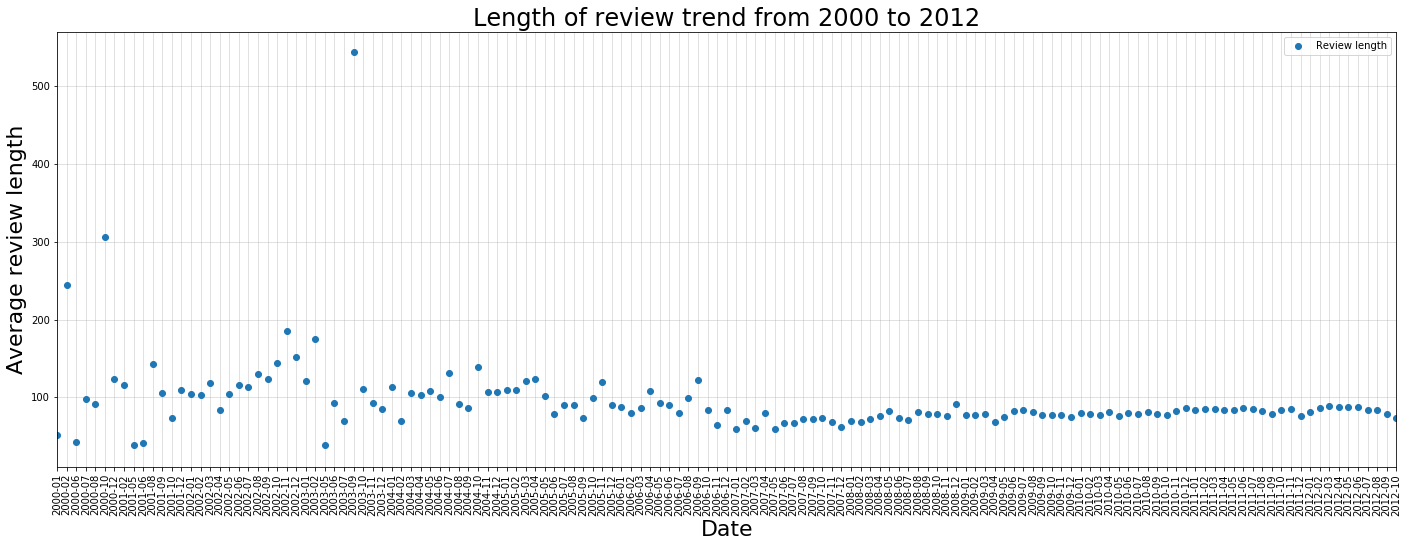

In [287]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Text_lenght'],label='Review length');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average review length',fontsize=22)
plt.title('Length of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_length_trend.png')
#stable review length

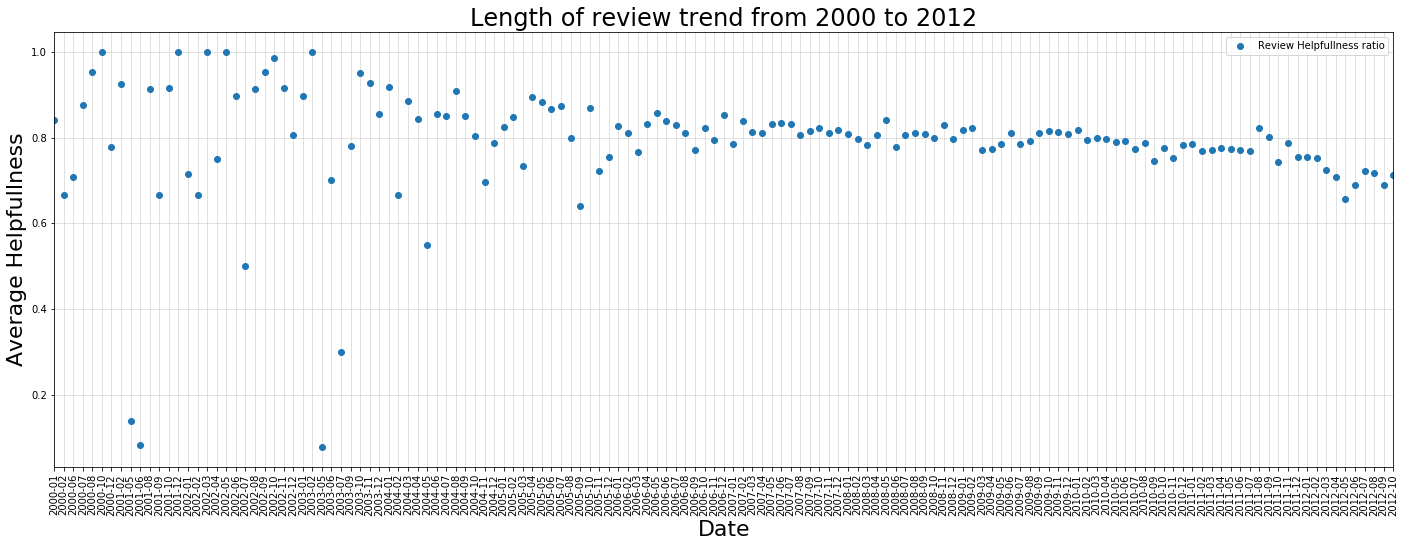

In [288]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Helpfulness_ratio'],label='Review Helpfullness ratio');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average Helpfullness',fontsize=22)
plt.title('Length of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_helpful_trend.png')

#drop can be due to visitor not getting time yet to check the reviews of 2012

In [195]:
# df_2011_data['Time_converted'] = df_2011_data['Time_converted'].map(lambda x:x.date())
# plt.plot_date(x=df_2011_data['Score'],y=df_2011_data['Time_converted'])

In [189]:
#sns.countplot(x="Score", data=df_2011_data)
#sns.countplot(x="Score", data=df_2010_data)
#sns.countplot(x="Score", data=df_2009_data)
#sns.factorplot(x="Time_converted_ym", data=df_2011_data)

In [315]:
top_reviewer_avg_data.to_csv('top_reviewer_avg_data.csv',index=False)

grp_avg_date.to_csv('grp_avg_date.csv',index=False)

In [126]:
check_name=pd.read_csv('amazon_top_reviewer_list.csv')

In [316]:
#amz_review_sorted_drop_duplicated.head()

In [317]:
amz_review_sorted_drop_duplicated.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,2011-06-13,2011-06,if you are looking for the secret ingredient i...,"[secret, ingredient, robitussin, addition, roo...",0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21,2012-10,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",1


In [318]:
amz_review_sorted_drop_duplicated.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght', 'Time_converted', 'Time_converted_ym', 'Text_new',
       'Text_new2', 'score_pos_neg'],
      dtype='object')

In [319]:
amz_review_less_col=amz_review_sorted_drop_duplicated[['Score','Time_converted_ym', 'Text_new2', 'score_pos_neg']]

In [320]:
amz_review_less_col.head()

,Score,Time_converted_ym,Text_new2,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [323]:
amz_review_less_col_rename=amz_review_less_col.rename(columns={'Text_new2':'Review_word_list'})

In [324]:
amz_review_less_col_rename.head()

,Score,Time_converted_ym,Review_word_list,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [325]:
amz_review_less_col_rename.to_csv('amz_review_less_col_rename.csv',index=False)

In [326]:
amz_review_less_col_rename['Review_word_list'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [127]:
check_name.head()

,UserId,Id
0,A3OXHLG6DIBRW8,419
1,AY12DBB0U420B,382
2,A281NPSIMI1C2R,321
3,A1YUL9PCJR3JTY,308
4,A1Z54EM24Y40LL,251


(10, 50)

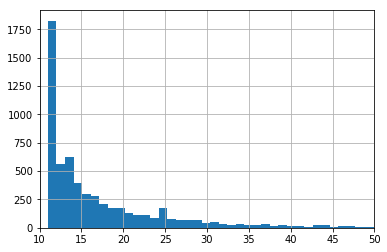

In [115]:
user_number_review[user_number_review['Id']>10]['Id'].hist(bins=400);
plt.xlim(10,50)

In [56]:
check=pd.read_csv('amazon_review_parsed_new2.csv')

In [69]:
check.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_lenght                int64
Time_converted            object
Time_converted_ym         object
Text_new                  object
Text_new2                 object
Text_new3                 object
dtype: object

In [74]:
eval(check['Text_new3'][0])
# import ast
# fruits = ast.literal_eval(fruits)

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [76]:
check['Text_new3']=check['Text_new3'].apply(lambda x: eval(x))

In [78]:
check['Text_new3'][0:5]

0    [bought, vitality, canned, dog, food, products...
1    [product, arrived, labeled, jumbo, salted, pea...
2    [confection, centuries, light, pillowy, citrus...
3    [secret, ingredient, robitussin, addition, roo...
4    [great, taffy, great, price, wide, assortment,...
Name: Text_new3, dtype: object

In [312]:
# amz_review_sorted_drop_duplicated['Text_new3'][0]

In [311]:
# check['Text_new3'].astype(object)[0]

In [306]:
# recent1=amz_review[(amz_review['Time_converted_ym']>'2012-01')]
# #recent2=amz_review[(amz_review['Time_converted']>'2012-01-26') & (amz_review['Score']==1)]
# plt.rcParams['agg.path.chunksize'] = 10000
# plt.figure(figsize=(12,4))
# plt.plot(recent1['Time_converted'],recent1['Score']);
# #plt.plot(recent2['Time_converted'],recent2['Score']);
# plt.xticks(rotation=90);

In [307]:
# recent2=recent1.groupby(by=['Time_converted_ym','Score']).mean()
# recent2.head(10)
# # plt.rcParams['agg.path.chunksize'] = 10000
# # plt.figure(figsize=(12,4))
# # plt.plot(recent2['Time_converted_ym'],recent2['Score']);
# # #plt.plot(recent2['Time_converted'],recent2['Score']);
# # plt.xticks(rotation=90);

In [308]:
# amz_review[amz_review['Time_converted']>'2012-01-26 00:00:00']

In [310]:
# from nltk.corpus import stopwords


# stop_word_list=(stopwords.words('english'))